# Dataset creation for satellite images

This Jupyter Notebook demonstrates the process of processing satellite images obtained  from different seasons. The main focus is on resizing the images and converting them to grayscale format for further analysis. 

In [25]:
import os
import glob
import logging
import cv2

In [27]:
folder_objects = [
    {
        "folder": "S2B_MSIL2A_20240215T102029_N0510_R065_T32TNS_20240215T144349.SAFE/GRANULE/L2A_T32TNS_A036270_20240215T102728/IMG_DATA/R10m/",
        "name_template": "T32TNS_20240215T102029_{channel}_10m.jp2"
    },
    {
        "folder": "S2A_MSIL2A_20240311T101831_N0510_R065_T32TNS_20240311T144645.SAFE/GRANULE/L2A_T32TNS_A045536_20240311T102207/IMG_DATA/R10m/",
        "name_template": "T32TNS_20240311T101831_{channel}_10m.jp2"
    },
    {
        "folder": "S2A_MSIL2A_20240709T102031_N0510_R065_T32TNS_20240709T142949.SAFE/GRANULE/L2A_T32TNS_A047252_20240709T102025/IMG_DATA/R10m/",
        "name_template": "T32TNS_20240709T102031_{channel}_10m.jp2"
    },
    {
        "folder": "S2A_MSIL2A_20240828T102021_N0511_R065_T32TNS_20240828T150452.SAFE/GRANULE/L2A_T32TNS_A047967_20240828T102019/IMG_DATA/R10m/",
        "name_template": "T32TNS_20240828T102021_{channel}_10m.jp2"
    },
    {
        "folder": "S2B_MSIL2A_20241002T101749_N0511_R065_T32TNS_20241002T162059.SAFE/GRANULE/L2A_T32TNS_A039559_20241002T102555/IMG_DATA/R10m/",
        "name_template": "T32TNS_20241002T101749_{channel}_10m.jp2"
    }
]

# Define the channels and output directory
CHANNELS = ['TCI', 'B04', 'B08']
output_dir = "Alps_dataset_2024"
max_size = 1024

In [29]:
# Function to resize and convert the image to grayscale
def resize_and_grayscale(image_path, max_size):
    '''
    Resize the image to the specified max_size while maintaining the aspect ratio and convert it to grayscale.

    :param image_path: The full path to the image file.
    :param max_size: The maximum allowed size (either height or width) for the resized image.
    :return: The processed grayscale and resized image.
    '''

    # Read the image and convert it to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Get the original dimensions
    height, width = image.shape[:2]

    # Resize the image using the calculated scaling factor
    scaling_factor = max_size / max(height, width)
    resized_image = cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
    return resized_image

In [31]:
def process_images(folder_objects, channels, output_dir, max_size):
    '''
    Process satellite images by resizing and converting them to grayscale.

    :param folder_objects: A list of dictionaries containing folder paths and filename templates for images.
                          Each dictionary should have two keys:
                          - "folder": The path to the folder containing images.
                          - "name_template": A string template for the image filenames, with a placeholder for the channel.
    :param channels: A list of strings, each representing a different image channel (e.g., 'TCI', 'B04', 'B08').
    :param output_dir: The directory where processed images will be saved.
    :param max_size: The maximum size (either width or height) to which images should be resized while maintaining aspect ratio.
    '''
    # Iterate over each folder and each channel
    for folder in folder_objects:
        for channel in CHANNELS:
            # Construct the full path pattern for the images in the folder based on the channel and name_template
            relative_path = os.path.join(folder['folder'], folder['name_template'].format(channel=channel))
            image_path_pattern = os.path.abspath(relative_path)

            # Use glob to find all image files that match the pattern
            image_files = glob.glob(image_path_pattern)

            # Logging the number of found images or a warning if none are found
            if image_files:
                logging.info(f"Found {len(image_files)} images for channel {channel}")
            else:
                logging.warning(f"No images found for channel {channel}")

            # Create an output subdirectory for each channel if it doesn't already exist
            dest_subdirectory = os.path.join(output_dir, channel)
            if not os.path.exists(dest_subdirectory):
                os.makedirs(dest_subdirectory)

            # Process each image file found
            for image_file in image_files:
                # Resize and convert the image to grayscale
                processed_image = resize_and_grayscale(image_file, max_size)

                # Create an output path by replacing the .jp2 extension with .png
                output_image_path = os.path.join(dest_subdirectory,
                                                 os.path.basename(image_file).replace('.jp2', '.png'))
                # Save the processed image as a PNG file
                cv2.imwrite(output_image_path, processed_image)


In [33]:
# Call the function to process the images
process_images(folder_objects, CHANNELS, output_dir, max_size)

Dataset successfully generated and saved as 'Alps_dataset_2024'

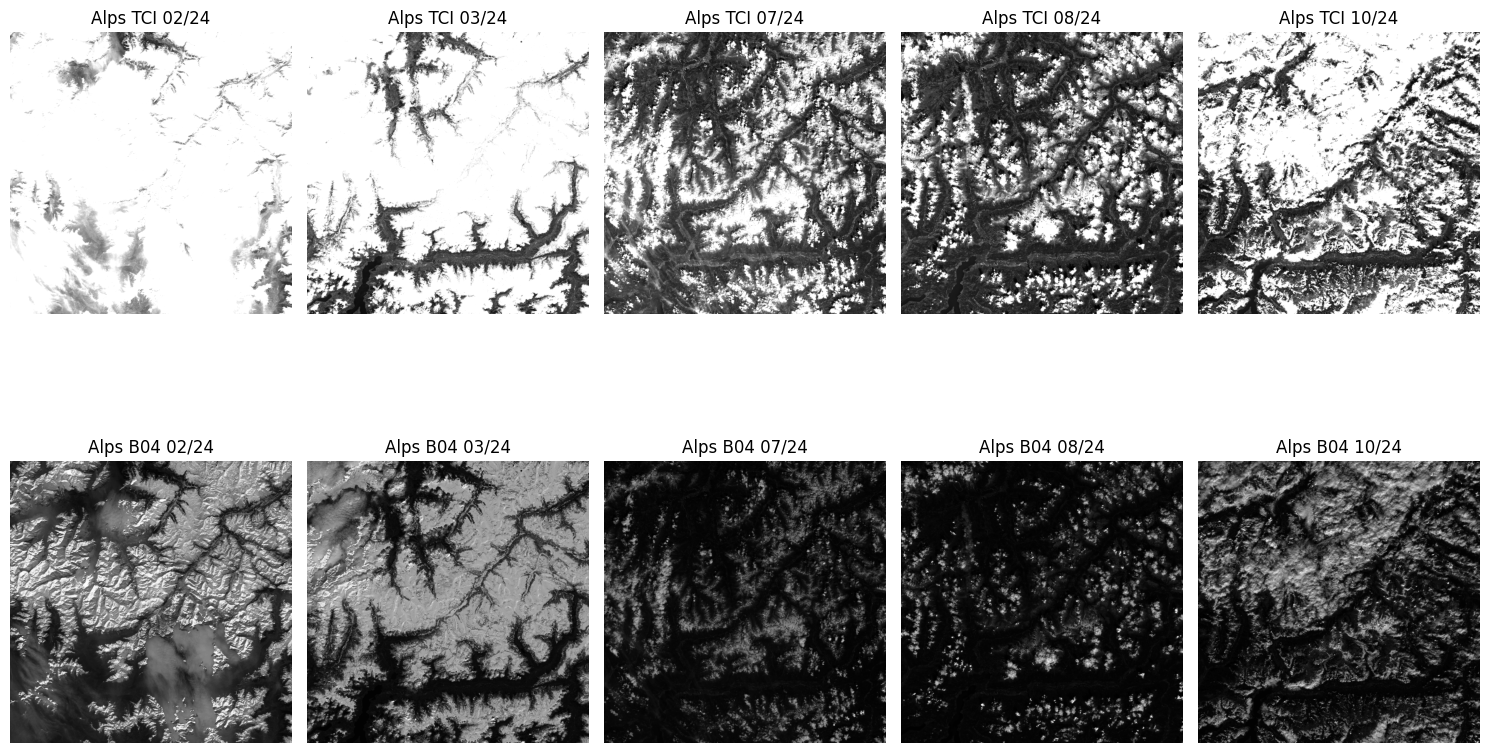

In [54]:
# Display processed images
import matplotlib.pyplot as plt

img_02_TCI = cv2.imread("Alps_dataset_2024/TCI/T32TNS_20240215T102029_TCI_10m.png", cv2.IMREAD_GRAYSCALE)
img_03_TCI = cv2.imread("Alps_dataset_2024/TCI/T32TNS_20240311T101831_TCI_10m.png", cv2.IMREAD_GRAYSCALE)
img_07_TCI = cv2.imread("Alps_dataset_2024/TCI/T32TNS_20240709T102031_TCI_10m.png", cv2.IMREAD_GRAYSCALE)
img_08_TCI = cv2.imread("Alps_dataset_2024/TCI/T32TNS_20240828T102021_TCI_10m.png", cv2.IMREAD_GRAYSCALE)
img_10_TCI = cv2.imread("Alps_dataset_2024/TCI/T32TNS_20241002T101749_TCI_10m.png", cv2.IMREAD_GRAYSCALE)

img_02_B04 = cv2.imread("Alps_dataset_2024/B04/T32TNS_20240215T102029_B04_10m.png", cv2.IMREAD_GRAYSCALE)
img_03_B04 = cv2.imread("Alps_dataset_2024/B04/T32TNS_20240311T101831_B04_10m.png", cv2.IMREAD_GRAYSCALE)
img_07_B04 = cv2.imread("Alps_dataset_2024/B04/T32TNS_20240709T102031_B04_10m.png", cv2.IMREAD_GRAYSCALE)
img_08_B04 = cv2.imread("Alps_dataset_2024/B04/T32TNS_20240828T102021_B04_10m.png", cv2.IMREAD_GRAYSCALE)
img_10_B04 = cv2.imread("Alps_dataset_2024/B04/T32TNS_20241002T101749_B04_10m.png", cv2.IMREAD_GRAYSCALE)

images = [img_02_TCI, img_03_TCI, img_07_TCI, img_08_TCI, img_10_TCI, 
          img_02_B04, img_03_B04, img_07_B04, img_08_B04, img_10_B04]
titles = ['Alps TCI 02/24', 'Alps TCI 03/24', 'Alps TCI 07/24', 'Alps TCI 08/24', 'Alps TCI 10/24',
          'Alps B04 02/24', 'Alps B04 03/24', 'Alps B04 07/24', 'Alps B04 08/24', 'Alps B04 10/24']

# Create a figure to hold the images
plt.figure(figsize=(15, 10))  # Set figure size for better layout

# Loop through the images to create subplots
for i in range(len(images)):
    plt.subplot(2, 5, i + 1)  # 5 rows, 2 columns
    plt.imshow(images[i], cmap='gray')  # Show each image in grayscale
    plt.title(titles[i])  # Set the title for each image
    plt.axis('off')  # Turn off axis labels

# Show the figure with the images
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the images
